In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [11]:
data = pd.read_csv('./appraisal_emotion.csv')

In [12]:
data

,emotion,motivational_relevance,novelty,certainity,goal_congruence,coping_potential,anticipation
0,Fear,-0.44,0.63,-0.73,0.03,-0.17,0.59
1,Shame,-0.73,0.07,-0.21,-0.11,1.31,-0.07
2,Guilt,-0.60,0.00,0.15,-0.36,1.31,-0.29
3,Disgust,-0.38,0.06,0.39,-0.96,-0.50,-0.19
4,Sadness,-0.87,-0.14,0.00,-0.21,-0.36,1.15
...,...,...,...,...,...,...,...
996,Shame,-0.73,0.07,-0.21,-0.11,1.31,-0.07
997,Shame,-0.73,0.07,-0.21,-0.11,1.31,-0.07
998,Shame,-0.73,0.07,-0.21,-0.11,1.31,-0.07
999,Shame,-0.73,0.07,-0.21,-0.11,1.31,-0.07


In [13]:
le = preprocessing.LabelEncoder()
data['emotion'] = le.fit_transform(data.emotion.values)

In [14]:
np.unique(data['emotion'])

array([0, 1, 2, 3, 4, 5, 6])

In [15]:
data

,emotion,motivational_relevance,novelty,certainity,goal_congruence,coping_potential,anticipation
0,2,-0.44,0.63,-0.73,0.03,-0.17,0.59
1,6,-0.73,0.07,-0.21,-0.11,1.31,-0.07
2,3,-0.60,0.00,0.15,-0.36,1.31,-0.29
3,1,-0.38,0.06,0.39,-0.96,-0.50,-0.19
4,5,-0.87,-0.14,0.00,-0.21,-0.36,1.15
...,...,...,...,...,...,...,...
996,6,-0.73,0.07,-0.21,-0.11,1.31,-0.07
997,6,-0.73,0.07,-0.21,-0.11,1.31,-0.07
998,6,-0.73,0.07,-0.21,-0.11,1.31,-0.07
999,6,-0.73,0.07,-0.21,-0.11,1.31,-0.07


In [5]:
column = 'motivational_relevance'
data[column] = preprocessing.MinMaxScaler().fit_transform(np.array(data[column]).reshape(-1,1))
np.mean(data['motivational_relevance'])

0.22562844880441443

In [34]:
data

,emotion,motivational_relevance,novelty,certainity,goal_congruence,coping_potential,anticipation
0,2,0.184549,1.000000,0.000000,0.891892,0.342222,0.734597
1,6,0.060086,0.416667,0.436975,0.765766,1.000000,0.421801
2,3,0.115880,0.343750,0.739496,0.540541,1.000000,0.317536
3,1,0.210300,0.406250,0.941176,0.000000,0.195556,0.364929
4,5,0.000000,0.197917,0.613445,0.675676,0.257778,1.000000
...,...,...,...,...,...,...,...
996,6,0.060086,0.416667,0.436975,0.765766,1.000000,0.421801
997,6,0.060086,0.416667,0.436975,0.765766,1.000000,0.421801
998,6,0.060086,0.416667,0.436975,0.765766,1.000000,0.421801
999,6,0.060086,0.416667,0.436975,0.765766,1.000000,0.421801


In [18]:
X = data.loc[:, data.columns != 'emotion']
y = data['emotion']

In [30]:
from scipy.stats import zscore
X = X.apply(zscore)
X = X.values
y= y.values

In [28]:
new_dat = pd.read_csv('./temp.csv')
new_dat = new_dat.apply(zscore)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        49

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00       331



In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        49

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00       331



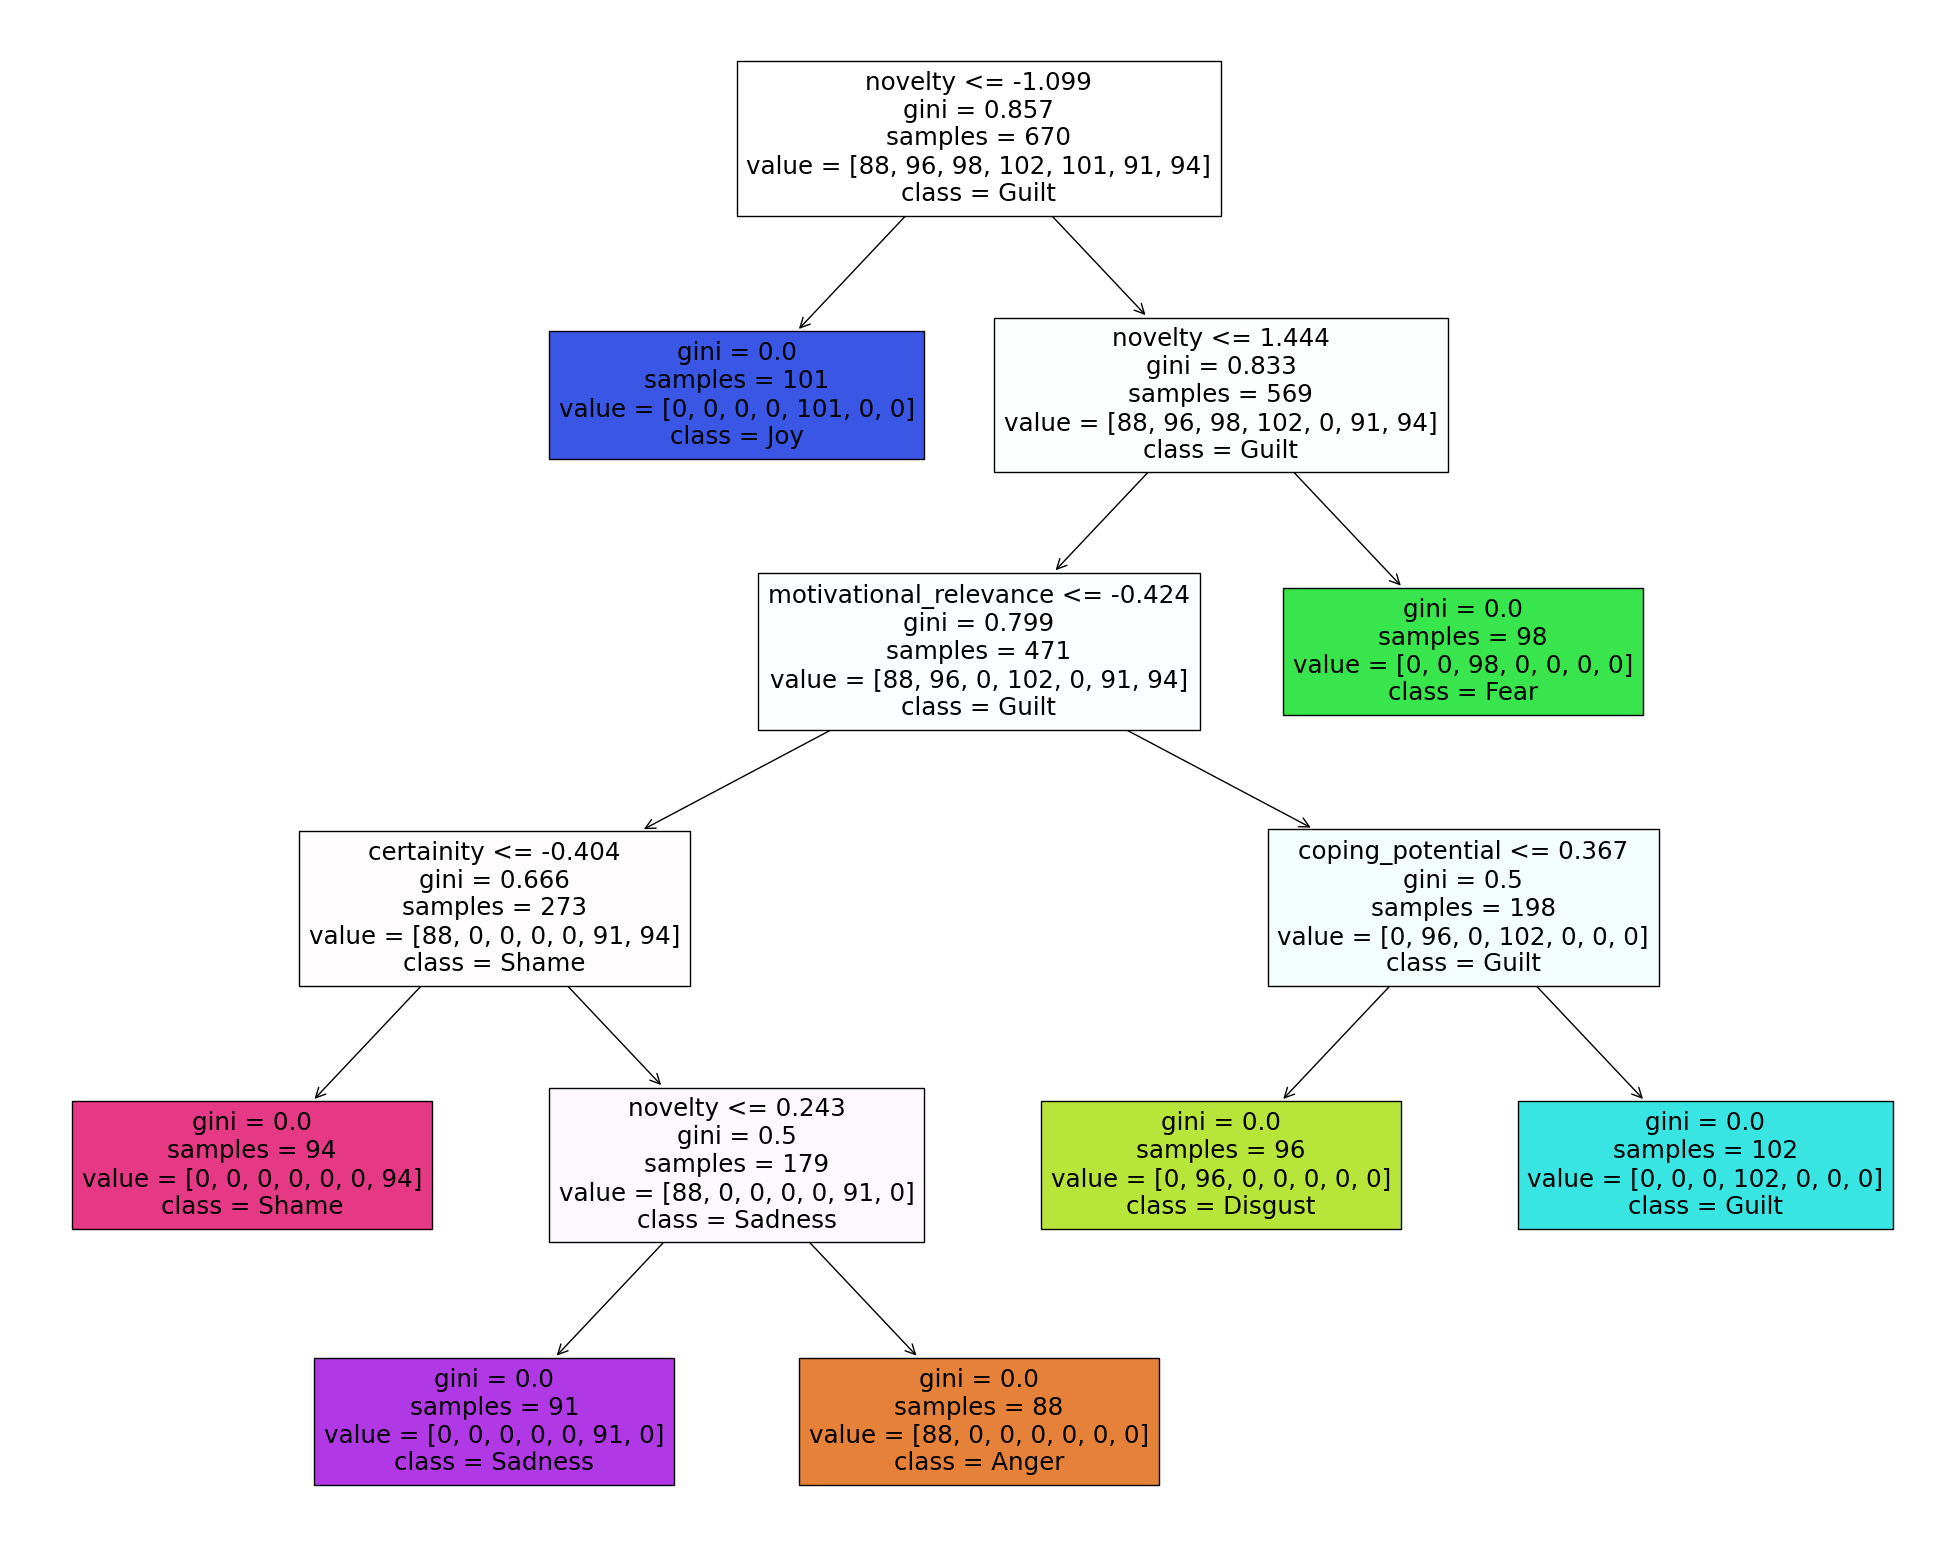

In [35]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=['motivational_relevance', 'novelty', 'certainity', 'goal_congruence', 'coping_potential', 'anticipation'],  
                   class_names=['Anger', 'Disgust', 'Fear', 'Guilt', 'Joy', 'Sadness', 'Shame'],
                   filled=True)

In [36]:
import pickle
with open('emotion_estimator.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [37]:
with open('emotion_estimator.pkl', 'rb') as f:
    clf = pickle.load(f)

In [38]:
emo_dict = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Guilt', 4: 'Joy', 5: 'Sadness', 6: 'Shame'}

In [39]:
pre = clf.predict([[0.0, 0.7105862927161081, 0.02662937558953352, 0.0, 0.80004, 0.6476273011854936]])

In [40]:
print(emo_dict[pre[0]])

Guilt


In [41]:
new_data = pd.read_csv('./temp.csv')

In [42]:
new_data

,Unnamed: 0,0,1,2,3,4,5
0,0,0.000000,0.638241,0.223304,0.000000,0.20016,0.920016
1,1,0.000000,0.576813,0.409139,0.000000,0.20016,0.914264
2,2,0.000000,0.626089,0.265028,0.000000,0.40012,0.936316
3,3,0.000000,0.730689,0.329299,0.737387,0.20016,0.914879
4,4,0.916667,0.681806,0.157247,0.606081,0.20016,0.915878
...,...,...,...,...,...,...,...
891,891,0.000000,0.799432,0.099369,0.526568,0.40012,0.942015
892,892,0.666667,0.886883,0.000056,0.442914,0.40012,0.952374
893,893,0.583333,0.580863,0.196962,0.343468,0.40012,0.935555
894,894,0.500000,0.874139,0.000885,0.412780,0.20016,0.927207


In [43]:
new_data.mean()

Unnamed: 0    447.500000
0               0.530971
1               0.772037
2               0.106702
3               0.425943
4               0.629762
5               0.938952
dtype: float64

In [45]:
new_data.std()

Unnamed: 0    258.797218
0               0.407309
1               0.110288
2               0.133804
3               0.345998
4               0.258976
5               0.127975
dtype: float64

In [46]:
new = new_data.apply(zscore)

In [47]:
new

,Unnamed: 0,0,1,2,3,4,5
0,-1.730119,-1.304336,-1.213826,0.871924,-1.231744,-1.659775,-0.148051
1,-1.726253,-1.304336,-1.771116,2.261553,-1.231744,-1.659775,-0.193024
2,-1.722386,-1.304336,-1.324070,1.183921,-1.231744,-0.887225,-0.020614
3,-1.718520,-1.304336,-0.375118,1.664529,0.900636,-1.659775,-0.188216
4,-1.714654,0.947466,-0.818595,0.377963,0.520923,-1.659775,-0.180402
...,...,...,...,...,...,...,...
891,1.714654,-1.304336,0.248532,-0.054840,0.290988,-0.887225,0.023947
892,1.718520,0.333338,1.041907,-0.797474,0.049077,-0.887225,0.104933
893,1.722386,0.128629,-1.734369,0.674942,-0.238502,-0.887225,-0.026560
894,1.726253,-0.076081,0.926288,-0.791281,-0.038065,-1.659775,-0.091830


In [50]:
new.mean()

Unnamed: 0   -6.344132e-17
0             4.956353e-17
1             1.348128e-16
2            -2.379049e-17
3             1.467080e-16
4            -6.740640e-17
5            -6.938894e-18
dtype: float64

In [49]:
new['1'].mean()

1.3481279584734043e-16